<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>

### HACKATHON

### Team DUBLIN DG 1

### Team Members:
1. Karishma Tyagi 
2. Kriti Dixit
3. Pooja Narke


### TASK:
Train either a linear regression or a classification ML model based on some open source financial or economic data. This is a very open task, you may choose any data that is in anyway related to financial activity or the finance sector.

a. An example of this could be: You think there is potentially a correlation between some macro economic factors, or that macro economic factors are correlated with other trends. You would then look for data gathered on those factors (e.g. what
would influence consumer inflation?). You can then quickly plot the data to see if there is a trend. If there is, you could use that data to train a model so that predictions can be made in future on those trends.


b. You may expand this task by saving your resulting model file (e.g. using joblib). You can then create a flask REST application that will load that joblib file. The REST application can then ask the model for a prediction when it receives incoming HTTP requests.

In [20]:
# Import statements

import pandas as pd                                         # For data manipulation
from sklearn.linear_model import LogisticRegression         # Logistic Regression Model
from sklearn.model_selection import train_test_split        # Splitting the dataset
from sklearn.metrics import accuracy_score                  # Accuracy Score
from sklearn.metrics import confusion_matrix                # Performance Evaluation
import matplotlib.pyplot as plt                             # visualisation
from matplotlib import style
import matplotlib as mpl
%matplotlib inline

from sklearn.neural_network import MLPClassifier            # Multi-layer perceptron
from sklearn.metrics import plot_confusion_matrix           # Confusion Matrix plot
import pandas_datareader as pdr                             # for loading data
import numpy as np                                          # probablities
import seaborn as sns                                       # Visualisation
from sklearn import preprocessing                           # Normalisation
from sklearn.linear_model import LinearRegression           # Linear Regression
from sklearn.metrics import mean_squared_error              # MSE
import joblib                                               # save model

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the citi data.
df_citi = pdr.get_data_yahoo('C', '2010-01-01')
df_citi

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2010-01-04  34.099998  33.400002  33.599998  34.000000  40679300.0  30.533976
2010-01-05  35.500000  34.099998  34.200001  35.299999  66861700.0  31.701447
2010-01-06  36.799999  35.099998  35.599998  36.400002  67433800.0  32.689320
2010-01-07  37.000000  36.099998  36.900002  36.500000  67245100.0  32.779129
2010-01-08  36.700001  35.099998  36.500000  35.900002  62409700.0  32.240284
...               ...        ...        ...        ...         ...        ...
2020-08-31  52.040001  51.099998  51.910000  51.119999  16280100.0  51.119999
2020-09-01  51.570000  50.540001  50.880001  51.200001  16909900.0  51.200001
2020-09-02  52.139999  50.660000  51.040001  51.950001  15348600.0  51.950001
2020-09-03  53.639999  51.230000  52.439999  51.500000  24980400.0  51.500000
2020-09-04  53.360001  52.040001  52.470001  52.593601   5787493.0  52.593601

[2688 rows x 6 columns]

In [3]:
# Statistics
df_citi.describe().transpose()

count          mean           std           min           25%  \
High       2688.0  5.192801e+01  1.343428e+01  2.410000e+01  4.254750e+01   
Low        2688.0  5.080695e+01  1.338996e+01  2.140000e+01  4.150000e+01   
Open       2688.0  5.138287e+01  1.340205e+01  2.256000e+01  4.208000e+01   
Close      2688.0  5.136091e+01  1.340764e+01  2.311000e+01  4.201000e+01   
Volume     2688.0  2.819004e+07  2.060581e+07  4.576200e+06  1.504068e+07   
Adj Close  2688.0  4.729994e+01  1.322741e+01  2.076468e+01  3.803584e+01   

                    50%           75%           max  
High       5.050000e+01  6.196250e+01  8.311000e+01  
Low        4.952000e+01  6.078000e+01  8.097000e+01  
Open       5.000000e+01  6.136500e+01  8.196000e+01  
Close      5.003000e+01  6.138750e+01  8.191000e+01  
Volume     2.194450e+07  3.468802e+07  3.267829e+08  
Adj Close  4.526154e+01  5.683247e+01  7.970868e+01

### DATA PREPROCESSING

In [4]:
# check null values

df_citi.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

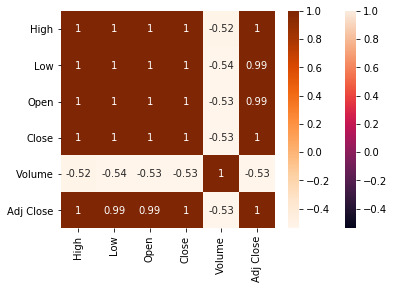

In [5]:
# initial correlation

heat = df_citi.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True, cmap='Oranges')
plt.show()

### Normalisation
x = df_citi.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_citi = pd.DataFrame(x_scaled)
df_citi

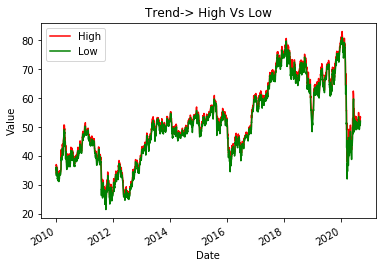

In [6]:
# trend
df_citi[['High', 'Low']].plot(color = ['red','green'])
plt.title('Trend-> High Vs Low')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc = 'best')

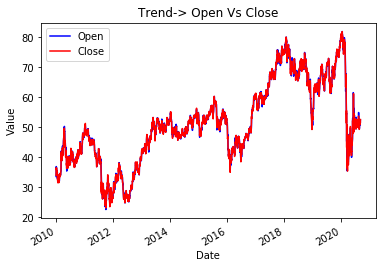

In [7]:
# trend
df_citi[['Open', 'Close']].plot(color = ['blue','red'])
plt.title('Trend-> Open Vs Close')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc = 'best')

In [8]:
# Moving Average

close_px = df_citi['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2020-08-31    49.071465
2020-09-01    49.119047
2020-09-02    49.181281
2020-09-03    49.251357
2020-09-04    49.357446
Name: Adj Close, Length: 2688, dtype: float64

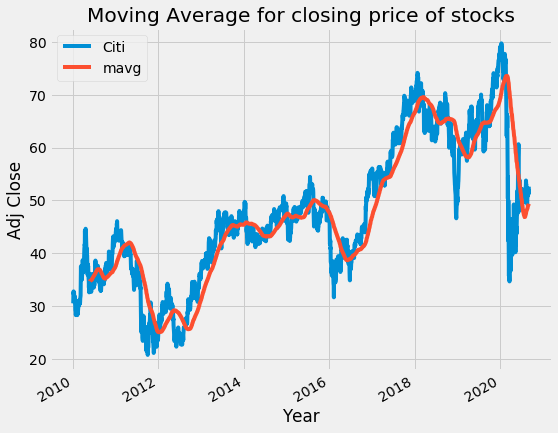

In [9]:
#Adjusting the size of matplotlib

mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('fivethirtyeight')

close_px.plot(label='Citi')
mavg.plot(label='mavg')
plt.title('Moving Average for closing price of stocks')
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.legend()
#plt.grid(False)

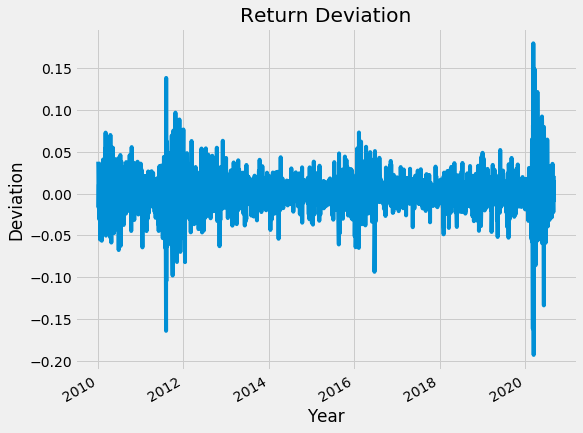

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')
plt.title('Return Deviation')
plt.xlabel('Year', color = 'black')
plt.ylabel('Deviation', color = 'black')
plt.show()

### MODEL BUILDING: LINEAR REGRESSION

In [11]:
X = df_citi
X = X.drop('Close', axis=1)
X = X.values

y = df_citi['Close'].values


In [12]:
# train_test split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
#implement linear regression
lreg = LinearRegression()

# training the model
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# prediction
y_pred = lreg.predict(X_test)

In [15]:
df_test = pd.DataFrame(columns=['Predicted', 'Actual'])
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
df_test

Predicted     Actual
0    46.671961  46.540001
1    73.495429  73.800003
2    63.337323  63.459999
3    29.931784  29.830000
4    48.921239  48.619999
..         ...        ...
533  48.973782  49.130001
534  47.113649  47.099998
535  48.293751  48.389999
536  27.012018  27.100000
537  74.962705  74.660004

[538 rows x 2 columns]

### PERFORMANCE EVALUATION

In [16]:
# MSE

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.11494604006022385


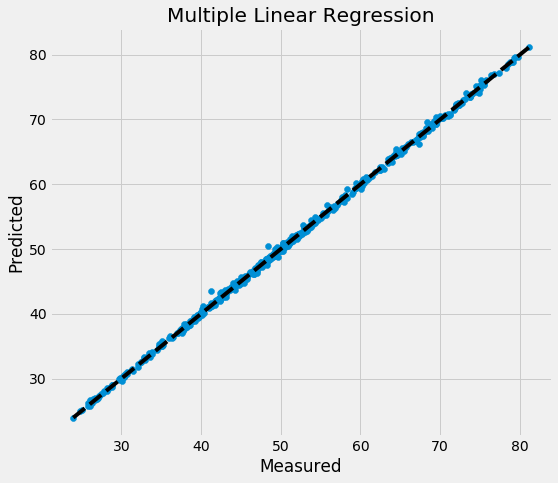

In [17]:
# comparative analysis of actual and predictions

fig, ax = plt.subplots()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Multiple Linear Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

Text(0.5, 0, 'Record')

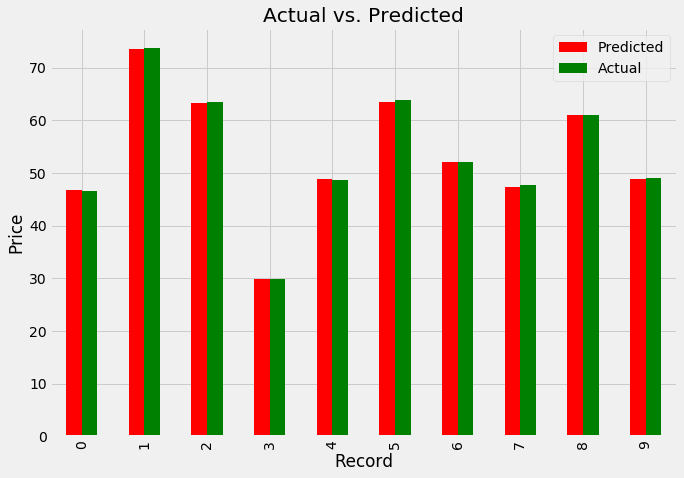

In [18]:
df_ = df_test.head(10)

df_.loc[:,['Predicted','Actual']].plot.bar(color=['red', 'green'], figsize=(10,7))
plt.title('Actual vs. Predicted')
plt.ylabel('Price')
plt.xlabel('Record')

In [19]:


joblib.dump(lreg, 'citi_stock_price_predictor.joblib')


['citi_stock_price_predictor.joblib']